In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from utils import *

### loading data

In [2]:
d='/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/postp/'
f='PPEn11_OAAT_postp.nc'
ds=xr.open_dataset(d+f)

In [3]:
d='/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/helpers/'
f='sparsegrid_landarea.nc'
la=xr.open_dataset(d+f).landarea

### pointing some things out about the dataset

In [38]:
#note that there are several experiments using different forcing
# ctl, PI climate, future climate, +5g NDEP, co2=285 ppmv and co2=867ppmv
ds.exp.values

array(['CTL2010', 'AF1855', 'AF2095', 'NDEP', 'C285', 'C867'], dtype='<U7')

In [79]:
#we have preprocessed only a subset of variables here
dvs=[]
match='_global_mean'
for v in ds.data_vars:
    if match in v:
        dvs.append(v.split(match)[0])

for v in dvs:
    print(v+':',ds[v+match].attrs['long_name'])

GPP: gross primary production
AR: autotrophic respiration (MR + GR)
HR: total heterotrophic respiration
NPP: net primary production
NBP: net biome production, includes fire, landuse, harvest and hrv_xsmrpool flux (latter smoothed over the year), positive for sink (same as net carbon exchange between land and atmosphere)
NEP: net ecosystem production, excludes fire, landuse, and harvest flux, positive for sink
ER: total ecosystem respiration, autotrophic + heterotrophic
NPP_NUPTAKE: Total C used by N uptake in FUN
EFLX_LH_TOT: total latent heat flux [+ to atm]
FCTR: canopy transpiration
FCEV: canopy evaporation
FGEV: ground evaporation
BTRANMN: daily minimum of transpiration beta factor
FGR: heat flux into soil/snow including snow melt and lake / snow light transmission
FSH: sensible heat not including correction for land use change and rain/snow conversion
SOILWATER_10CM: soil liquid water + ice in top 10cm of soil (veg landunits only)
TWS: total water storage
QRUNOFF: total liquid run

In [46]:
#many more variables are available, inspect for example:
d='/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/'
f=d+'PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'
f

'/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'

In [80]:
#here is a key for the parameter coding if you need it
d='/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/helpers/'
f=d+'surviving.csv'
f

'/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/helpers/surviving.csv'

In [65]:
#we calculated the mean, stdev, and seasonal amplitude for each variable
dvs=np.array([v for v in ds.data_vars])
np.unique([v.split('_')[-1] for v in dvs[:-2]])

array(['amp', 'mean', 'std'], dtype='<U4')

In [68]:
#we have these globally, but also at the biome and pft levels
# as well as at each of our 400 gridcells 
dvs=np.array([v for v in ds.data_vars])
np.unique([v.split('_')[-2] for v in dvs[:-2]])

array(['biome', 'global', 'gridded', 'pft'], dtype='<U7')

In [70]:
#here is an example data array
ds.GPP_global_mean

<xarray.DataArray 'GPP_global_mean' (param: 212, exp: 6, minmax: 2)>
[2544 values with dtype=float64]
Coordinates:
  * minmax   (minmax) <U3 'min' 'max'
  * exp      (exp) <U7 'CTL2010' 'AF1855' 'AF2095' 'NDEP' 'C285' 'C867'
  * param    (param) <U32 'default' 'C2_liq_Brun89' 'CWD' ... 'zlnd' 'zsno'
Attributes:
    long_name:     gross primary production
    units:         gC/m^2/s
    cell_methods:  time: mean

### example plots

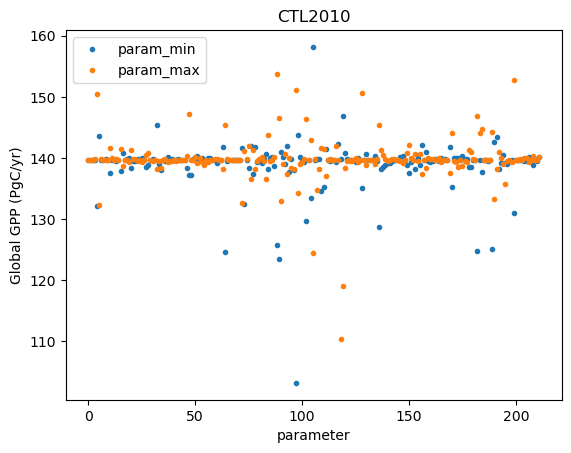

In [5]:
cf=24*60*60*365*1e-9*la.sum() #gc/m2/s --> PgC/yr globally
exp='CTL2010'
plt.plot(cf*ds.GPP_global_mean.sel(exp=exp),'.')
plt.xlabel('parameter')
plt.ylabel('Global GPP (PgC/yr)')
plt.legend(['param_min','param_max'])
plt.title(exp);

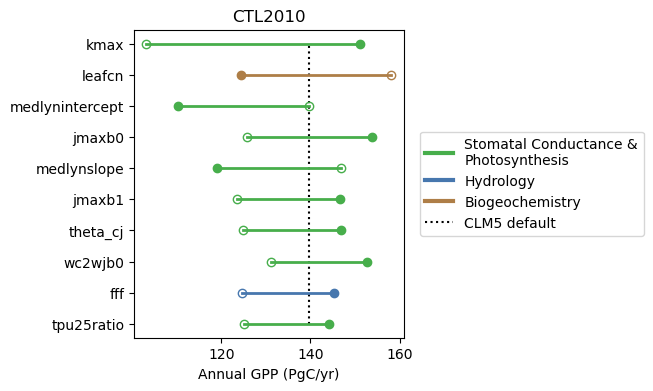

In [82]:
#plotting the top ten influential parameters on global GPP
#   by absolute parameter effect size

#set up figure
fig,axs=plt.subplot_mosaic('AX;AB;AY',
                           figsize=[6,4],
                           gridspec_kw={'width_ratios': [2,1],'height_ratios': [1,1,1]})
for s in 'BXY':
    axs[s].axis('off')

#make the ranking plot
cf=24*60*60*365*1e-9*la.sum() #gc/m2/s --> PgC/yr globally
exp='CTL2010'
da=cf*ds.GPP_global_mean.sel(exp=exp)
colors,cats=rank_plot(da,10,axs['A'])
axs['A'].set_xlabel('Annual GPP (PgC/yr)')
axs['A'].set_title(exp)

#manual legend
for color,cat in zip(colors,cats):
    axs['B'].plot([1,1],[1,1],lw=3,color=color,label=cat)
axs['B'].plot([1,1],[1,1],'k:',label='CLM5 default')
axs['B'].legend(loc=10)
fig.subplots_adjust(wspace=0.3)